<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Tareas/TodasTareas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo del estimador y matriz inversa

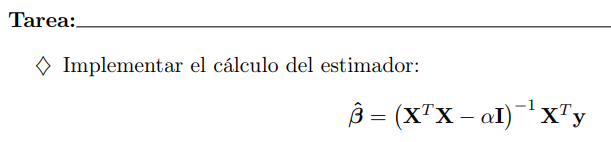

In [ ]:
# Datos de ejemplo (X y y)
X = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [2, 3, 4, 5]

# Obtener las dimensiones de X
n = len(X)
p = len(X[0])

# Inicializar las matrices y vectores
XT = [[0] * n for _ in range(p)]
for i in range(p):
    for j in range(n):
        XT[i][j] = X[j][i]

# Calcular XT*X
XTX = [[0] * p for _ in range(p)]
for i in range(p):
    for j in range(p):
        for k in range(n):
            XTX[i][j] += XT[i][k] * X[k][j]

# Calcular XT*y
XTy = [0] * p
for i in range(p):
    for j in range(n):
        XTy[i] += XT[i][j] * y[j]

# Calcular (XTX)^(-1)
# Puedes usar un algoritmo de inversión de matriz, como Gauss-Jordan, si p es pequeño.
# Sin embargo, ten en cuenta que esto puede no ser eficiente para matrices grandes.
# Para matrices grandes, es preferible usar numpy u otra biblioteca.
def inverse_matrix(matrix):
    n = len(matrix)

    # Crear una matriz aumentada [matrix | I]
    augmented_matrix = [row + [0] * n for row in matrix]
    for i in range(n):
        augmented_matrix[i][n + i] = 1

    # Aplicar eliminación gaussiana para obtener la matriz identidad en la izquierda
    for col in range(n):
        pivot_row = None
        for row in range(col, n):
            if augmented_matrix[row][col] != 0:
                pivot_row = row
                break
        if pivot_row is None:
            raise ValueError("La matriz no es invertible")

        augmented_matrix[col], augmented_matrix[pivot_row] = augmented_matrix[pivot_row], augmented_matrix[col]

        pivot_val = augmented_matrix[col][col]
        for j in range(n + n):
            augmented_matrix[col][j] /= pivot_val
        for row in range(n):
            if row != col:
                factor = augmented_matrix[row][col]
                for j in range(n + n):
                    augmented_matrix[row][j] -= factor * augmented_matrix[col][j]

    # Extraer la matriz inversa de la parte derecha de la matriz aumentada
    inverse = [row[n:] for row in augmented_matrix]

    return inverse


# Calcular β
beta_hat = [0] * p
if p < 4:
    # Si p es pequeño, calcula la inversión de matriz manualmente
    XTX_inverse = inverse_matrix(XTX)
    for i in range(p):
        for j in range(p):
            beta_hat[i] += XTX_inverse[i][j] * XTy[j]
else:
    # Para p grande, es mejor usar una biblioteca de álgebra lineal como numpy
    print("No se puede calcular el estimador de mínimos cuadrados porque p es demasiado grande")

# Imprimir el resultado
print("Estimador de mínimos cuadrados (beta_hat):", beta_hat)

Estimador de mínimos cuadrados (beta_hat): [0.0, 1.0]


In [ ]:
# Ejemplo de uso
matrix = [[2, 1], [5, 3]]
try:
    inverse = inverse_matrix(matrix)
    for row in inverse:
        print(row)
except ValueError as e:
    print(e)

[3.0, -1.0]
[-5.0, 2.0]


# Estimador, Ridge, Lasso
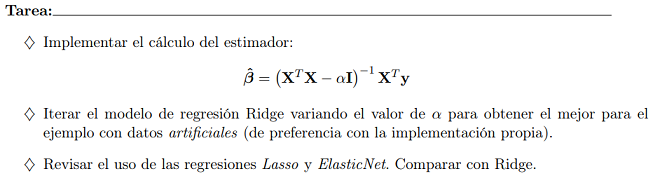

## Resorte

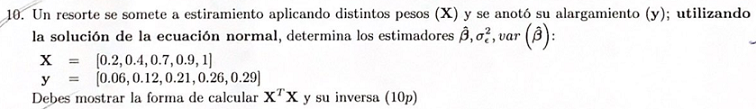

El primer paso es calcular $XX^T$


$$\begin{bmatrix}
a_1 & a_2 & a_3 & a_4 & a_5
\end{bmatrix}
\cdot
\begin{bmatrix}
a_1 \\
a_2 \\
a_3 \\
a_4 \\
a_5
\end{bmatrix}
=
(a_1)^2+(a_2)^2+(a_3)^2+(a_4)^2+(a_5)^2$$


En este caso el resultado seria:


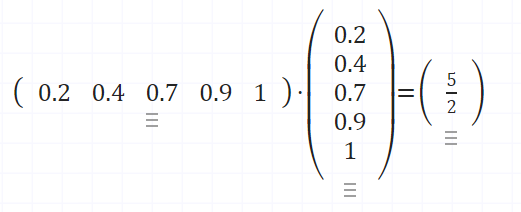

Para calcular $(XX^T)^{-1}$ solo se saca la inversa

$$\begin{bmatrix}
\dfrac{5}{2}
\end{bmatrix}^{-1} =
\begin{bmatrix}
\dfrac{2}{5}
\end{bmatrix}
$$

In [ ]:
import numpy as np
# Los datos
X = np.array([0.2, 0.4, 0.7, 0.9, 1])
Y = np.array([0.06,0.12,0.21,0.26,0.29])



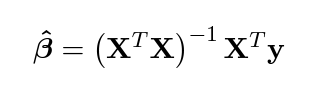



In [ ]:
def estimadorBeta(X,Y):
  aux=1/(np.dot(X.T,X))
  return np.dot(np.dot(aux,X.T), Y)

Beta=estimadorBeta(X,Y)
print(Beta)

0.2924


In [ ]:
def varianza(X,Y):
  n=len(Y)
  dim=X.ndim
  Beta=estimadorBeta(X,Y)
  y_=np.dot(X.T,Beta)
  media=sum(((Y-y_)**2))/(n-dim)
  return media

Varianza=varianza(X,Y)
print(Varianza)

1.3900000000000036e-05


In [ ]:
def varianza_Beta(X,Y):
  Varianza=varianza(X,Y)
  var_beta=np.dot(Varianza,1/(np.dot(X.T,X)))
  return var_beta

varBeta=varianza_Beta(X,Y)
print(varBeta)

5.5600000000000145e-06


## Lasso, ElasticNet

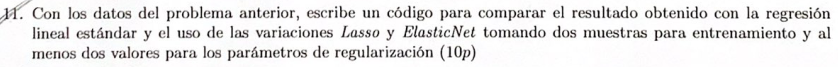

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [ ]:
X = np.array([0.2, 0.4, 0.7, 0.9, 1])
y = np.array([0.06,0.12,0.21,0.26,0.29])

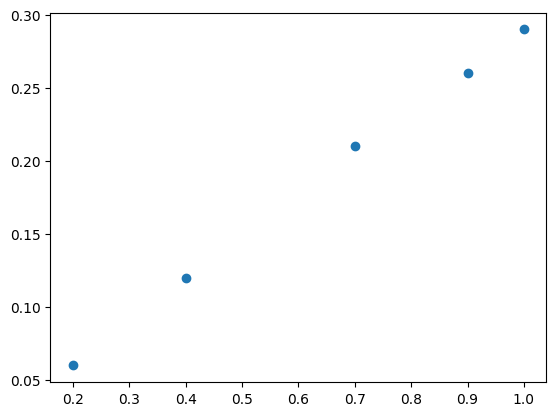

In [ ]:
plt.scatter(X,y);

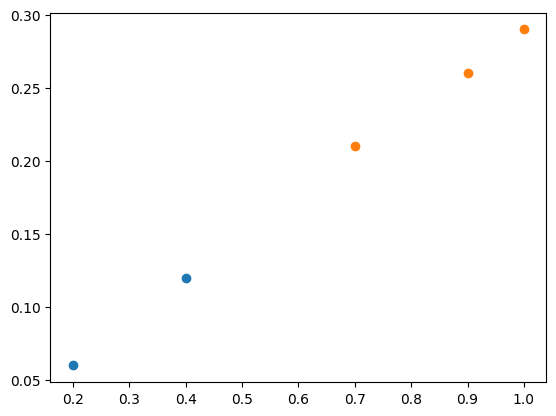

In [ ]:
x_train, x_test = X[:2], X[2:]
y_train, y_test = y[:2], y[2:]

x_train.resize(len(x_train),1)
x_test.resize(len(x_test),1)

y_train.resize(len(y_train),1)
x_test.resize(len(y_test),1)

plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test);

In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)

print(f'Error {mse(y_test,lm.predict(x_test))}')
x1 = lm.coef_[0][0]
y1  = lm.intercept_

Error 6.666666666666716e-05


In [ ]:
alpha= 0.009
ls = ElasticNet(alpha=alpha)
ls.fit(x_train,y_train)
x2 = ls.coef_[0]
y2 = ls.intercept_[0]

print(f'Error: {mse(y_test,ls.predict(x_test))}')

Error: 0.027766666666666665


In [ ]:
rd = Ridge(alpha=alpha)
rd.fit(x_train,y_train)
x3 = rd.coef_[0][0]
y3 = rd.intercept_[0]

print(f'Error: {mse(y_test,rd.predict(x_test))}')

Error: 0.00217808164883076


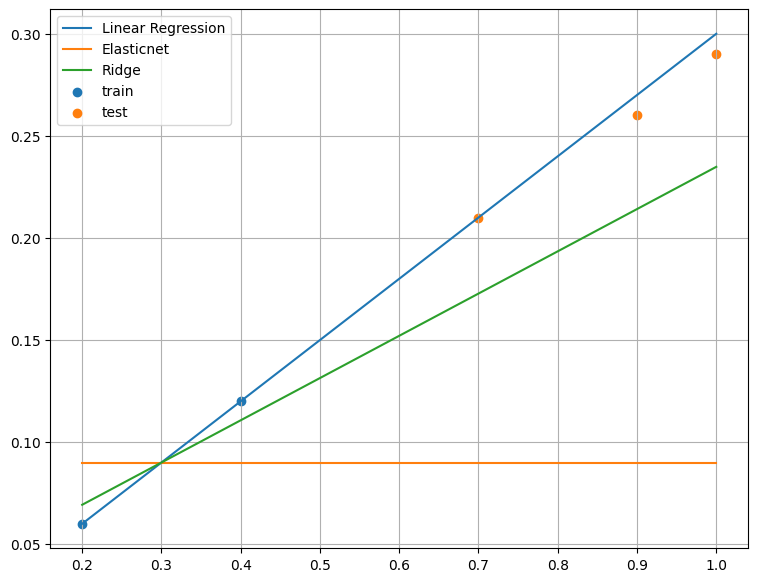

In [ ]:
xx = np.linspace(0.2,1,100)

plt.figure(figsize=(9,7))

plt.plot(xx,xx*x1+y1,label='Linear Regression')
plt.plot(xx,xx*x2+y2,label='Elasticnet')
plt.plot(xx,xx*x3+y3,label='Ridge')

plt.scatter(x_train,y_train,label='train')
plt.scatter(x_test,y_test,label='test')

plt.grid(True)
plt.legend();

Podemos ver que la regresion lineal que mejor se comporta es con la regresion lineal habitual para el valor de alpha que tenemos, pero si se da un valor mas pequeño para el alpha, las regularizaciones empiezan a tener mejor comportamiento (alpha= 0.00009)

# Matriz de dispersión de acuerdo al vector de medias

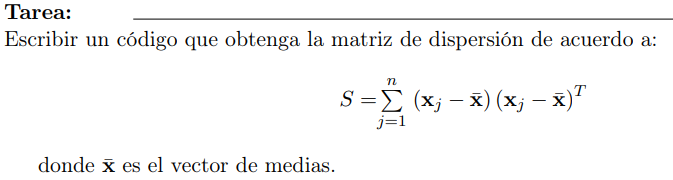

+Escribe un código que obtenga la matriz de dispersión

Es análogo a la siguiente tarea:
 Tarea: Escribir un código que obtenga la matriz de dispersión de acuerdo a:

 $S = \sum_{j=1}^{n} (x_j - \bar{x}) (x_j - \bar{x})^T$

donde $\bar{x}$ es el vector de medias.

**Solución**

Idea del código:

$\bar{x}$ Se trata de el vector de medias de cada clase
$x_j$ Son los datos de cada tupla

Se entiende que al parecer se necesita que se aplique la misma ecuacion pero para diferentes conjuntos. Primero, para obtener la matriz de dispersion de la propia clase, se puede interpretar que se esta usando cada fila que pertence a una especifica clase $y$, tal que se esta restando con su vector correspondiente de medias.


1. vector_data = conjunto de datos x de entrenamiento estandarizados
2. vector_etiquetas: conjunto de datos y de entrenamiento
3. vector_medias: medias de cada clase

In [ ]:
## Vector de medias - Cálculo
import numpy as np

# Cantidad de clases
clases = np.unique(y_train)

vector_medias = []

for i in clases:
  datos_clase = x_train_std[y_train==i]

  # Sacando la media de cada clase
  media_datosX = np.mean(datos_clase,axis=0) # axis=0 es para obtener de cada columna
  vector_medias.append(media_datosX) # Vector de medias de las categorias de la clase actual

vector_medias # Vector de medias de cada clase

NameError: ignored

In [ ]:
import numpy as np

def matriz_dispersion(vector_data,vector_etiquetas,vector_medias):

  size = vector_data.shape[1]
  Sw = np.zeros((size, size))
  clases =  np.unique(vector_etiquetas)

  for i in clases:
    matrix_aux = np.zeros((size, size))
    for renglon in vector_data[vector_etiquetas==i]:
      medias = vector_medias[i-1].reshape(size,1)
      renglon = renglon.reshape(size,1)

      matriz_dif = renglon - medias
      matrix_aux += matriz_dif.dot(matriz_dif.T)


    Sw += matrix_aux # Se intercambia para que sea compatible la multiplicacion, no obstante se manteniendo lo mismo que A^T A = A A^T

  return Sw

# KPCA - Reducción no lineal de dimensión: Análisis de Componentes Principales por Núcleos

La idea de este algoritmo es llevar los datos que no se puede separar de forma lineal a un espacio de dimensión mayor a la que está definida originalmente los datos.


$\phi : \mathbb{R}^d \rightarrow \mathbb{R}^k; \quad (k \neq d)$

De manera que en el espacio original $d$ se estará realizando combinaciones lineales sobre el nuevo espacio de dimensión mayor $k$. De esta manera se tendrá que una vez proyectado con una nueva característica en esta dimensión, se podrá realizar una separación lineal, y aquí es donde se aplica PCA para poder realizar una reducción de dimensión pero ahora es lineal. Se vuelve a proyectar los datos en la dimensión original pero ahora en esta proyección los datos se encuentran separados linealmente.

$x = [x1, x2]^T$

Aplicando la función phi

$z = [x_1^2,\sqrt{2x_1x_2},(x_2^{2})]^T$


Existen diferentes kernels a usar, vamos a usar el kernel gaussiano, también llamado: Radial Basis Function RBF.

### Pasos del código
1. Obtener matriz de núcleos K.

$k(x^{(i)}, x^{(j)}) = \exp\left(-\gamma||x^{(i)} - x^{(j)}\|^2\right); \quad \gamma = \frac{1}{2\sigma}$

$K = \begin{bmatrix}
k(x^{(1)}, x^{(1)}) & k(x^{(1)}, x^{(2)}) & \cdots & k(x^{(1)}, x^{(n)}) \\
k(x^{(2)}, x^{(1)}) & k(x^{(2)}, x^{(2)}) & \cdots & k(x^{(2)}, x^{(n)}) \\
\vdots & \vdots & \ddots & \vdots \\
k(x^{(n)}, x^{(1)}) & k(x^{(n)}, x^{(2)}) & \cdots & k(x^{(n)}, x^{(n)}) \\
\end{bmatrix}$

Si hay 100 muestras, habrá k es una matrix de 100x100.

2. Centrar la matriz K utilizando la siguiente fórmula:
$K_0 = K - 1nK - K1n + 1nK1n$
donde 1n es una matriz n \times n-dimensional en la que todos los valores son iguales a 1

3. Seleccionar los k eigenvectores de la matriz centrada que corresponden con los k mayores eigenvalores




In [ ]:
import scipy
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np

def rfb_kpca(X, gamma, n_components):
	sq_dists = pdist(X, 'sqeuclidean')
	mat_sq_dists = squareform(sq_dists)
	K = np.exp(-gamma * mat_sq_dists)
	N = K.shape[0]
	one_n = np.ones((N,N)) / N
	K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
	eigenvals, eigenvecs = eigh(K)
	eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:,::-1]
	eigenvecs = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
	eigenvals = np.column_stack([eigenvals[i] for i in range(n_components)])
	return eigenvecs,eigenvals

### Se establece el conjunto de datos que se usará - Medias Lunas
Para este caso se tendrá un conjunto de datos de medias lunas. Queda obvio que no se puede dividir esto linealmente, por lo cual el uso de un PCA o LDA es inútil para esto.

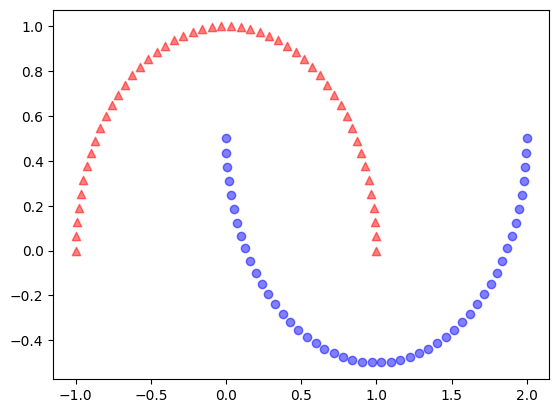

In [ ]:
# Estableciendo un conjunto de datos
import matplotlib.pyplot as plt

# Conjunto de datos de medias lunas
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,random_state=123)

# Graficando el conjunto de datos
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

### Graficando resultados de medias lunas

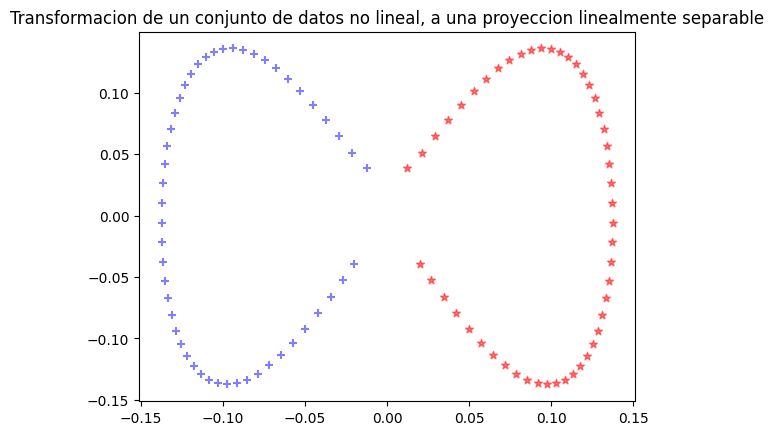

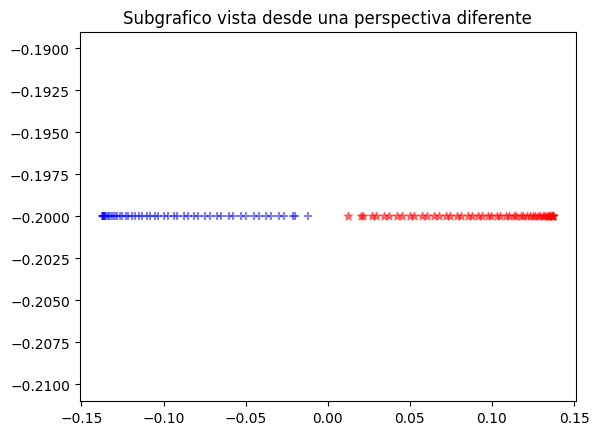

In [ ]:
X_kpca,l = rfb_kpca(X,gamma=15,n_components=12)

# Graficando el primer conjunto
plt.scatter(X_kpca[y==0,0],X_kpca[y==0,1],marker='*',color='red',alpha=0.5)
# Graficando el segundo conjunto
plt.scatter(X_kpca[y==1,0],X_kpca[y==1,1],marker='+',color='blue',alpha=0.5)
plt.title("Transformacion de un conjunto de datos no lineal, a una proyeccion linealmente separable")
plt.show()


# Desde otra perspectiva, vista desde el eje 'y', esto para que se vea tal cual que es linealmente separable
plt.scatter(X_kpca[y==0,0], np.zeros((50,1)) -0.2 ,marker='*',color='red',alpha=0.5)
# Graficando el segundo conjunto
plt.scatter(X_kpca[y==1,0],np.zeros((50,1)) -0.2,marker='+',color='blue',alpha=0.5)
plt.title("Subgrafico vista desde una perspectiva diferente")
plt.show()

# rbf_kpca son círculos concéntricos

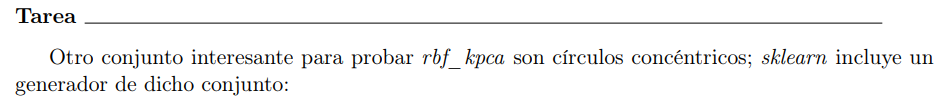

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import scipy

In [ ]:
def rbf_kpca(X,gamma,n_components):
  """ RBF KernelPCA
  Params
  -------
  X: {Numpy ndarray}, shape =[n_samples,n_features]
    cojunto de muestras
  gamma: float
    Parametro de ajuste del kerner RBF
  n_components: int
    Numero de conponentes principales a devolver

  Returns
  ---------
  alphas: {Numpy ndarray}, shape = [n_samples,k_features]
    Conjunto de datos proyectados
  lambdas: {Numpy ndarray}, shape = [n_samples]
    Eigenvalores correspondientes
  """

  ##     calcular las distancias cuadraticas de todas las parejas de muestras
  sq_dist = pdist(X, 'sqeuclidean')
  ##    converrtir a una matriz cuadrada
  mat_sq_dist = squareform(sq_dist)
  ##    obtenre matriz de nucleos
  K = np.exp(-gamma * mat_sq_dist)
  ##    centrar la matriz (restarle la media)
  n = K.shape[0]
  one_n = np.ones((n,n)) /n
  K = K -one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  ##    obtener los eigenpares
  eigenvals, eigenvecs = eigh(K) ## los devuelve ordenados por el valor de los eigenvals
  ##    invertimos los arreglos
  eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:,::-1]
  ##    seleccionamos los k primeros eigenvecs correspondientes a los mayores eigenvals
  alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
  ##    lo mismo con los eigenvals
  lambdas = np.column_stack([eigenvals[i] for i in range(n_components)])

  return alphas, lambdas

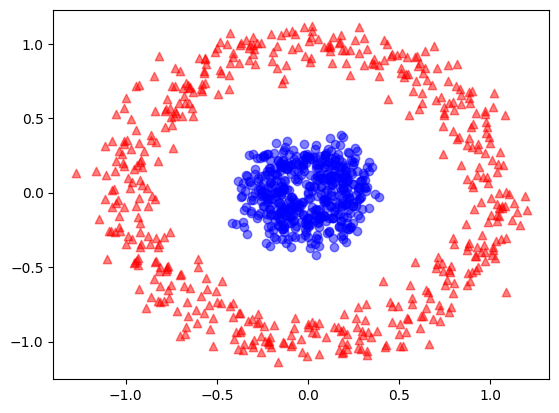

In [ ]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1],color='r',alpha=0.5,marker='^')
plt.scatter(X[y==1,0],X[y==1,1],color='b',alpha=0.5,marker='o')

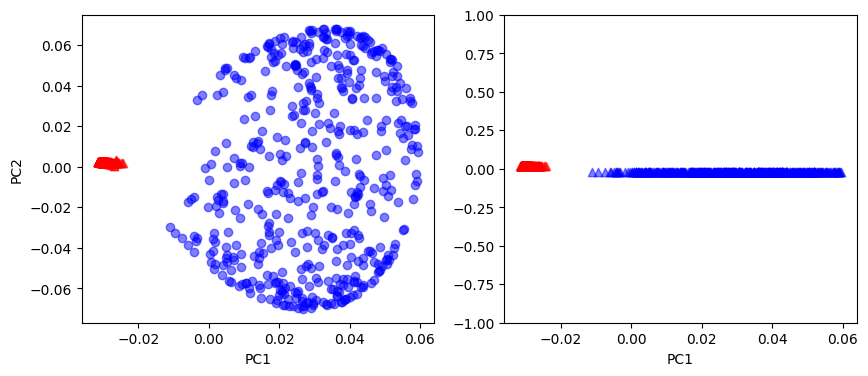

In [ ]:
#KernelPCA
from sklearn.decomposition import KernelPCA

X_pca = KernelPCA(2,kernel='rbf')
X_pca,l = rbf_kpca(X,gamma=15,n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],marker='o',color='blue',alpha=0.5)

ax[1].scatter(X_pca[y==0,0],np.zeros((500,1))+0.02,marker='^',color='red',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((500,1))-0.02,marker='^',color='b',alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1]);

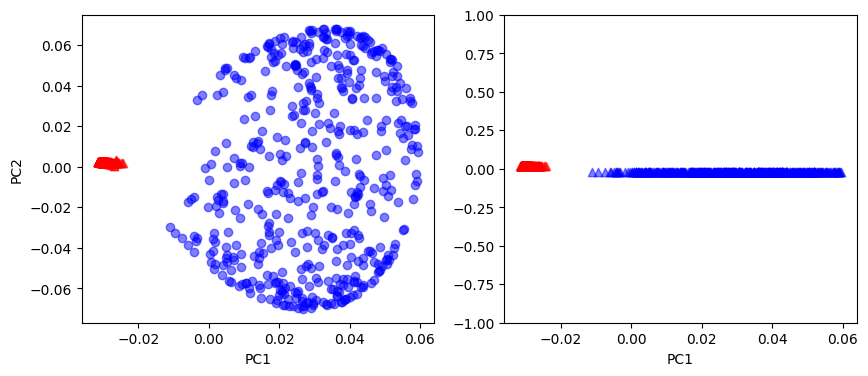

In [ ]:
# rbf_kpca

X_pca,l = rbf_kpca(X,gamma=15,n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],marker='o',color='blue',alpha=0.5)

ax[1].scatter(X_pca[y==0,0],np.zeros((500,1))+0.02,marker='^',color='red',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((500,1))-0.02,marker='^',color='b',alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1]);

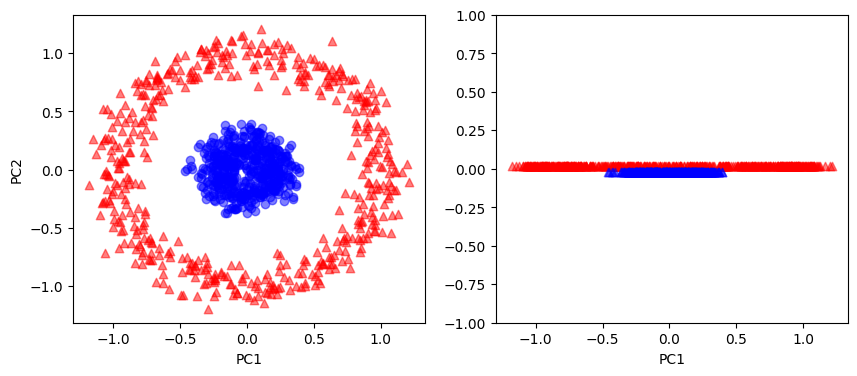

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],marker='o',color='blue',alpha=0.5)

ax[1].scatter(X_pca[y==0,0],np.zeros((500,1))+0.02,marker='^',color='red',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((500,1))-0.02,marker='^',color='b',alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1]);

### Implementando a KPCA pero ahora usando otro kernel, en este caso será con el kernel tangente hiperbolico, o sea sigmoide

In [ ]:
import scipy
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np

def kpca_sigmoide(X, gamma, n_components):
	sq_dists = pdist(X, 'sqeuclidean')
	mat_sq_dists = squareform(sq_dists)
	K = np.tanh(-gamma * mat_sq_dists)

  # Centrando la matriz k
	N = K.shape[0]
	one_n = np.ones((N,N)) / N
	K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
	eigenvals, eigenvecs = eigh(K)
	eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:,::-1]
	eigenvecs = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
	eigenvals = np.column_stack([eigenvals[i] for i in range(n_components)])
	return eigenvecs,eigenvals

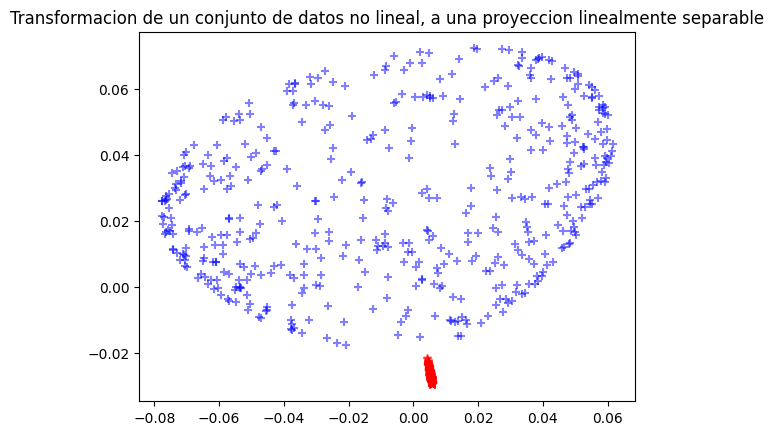

In [ ]:
X_kpca_sig,l = kpca_sigmoide(X,gamma=15,n_components=12)

# Graficando el primer conjunto
plt.scatter(X_kpca_sig[y==0,0],X_kpca_sig[y==0,1],marker='*',color='red',alpha=0.5)
# Graficando el segundo conjunto
plt.scatter(X_kpca_sig[y==1,0],X_kpca_sig[y==1,1],marker='+',color='blue',alpha=0.5)
plt.title("Transformacion de un conjunto de datos no lineal, a una proyeccion linealmente separable")
plt.show()

# LDA medias lunas

¿Qué sucede al utilizar Linear Discriminant Analysis (LDA) sobre el conjunto de medias lunas? Escribe un código que lo muestre

Solución

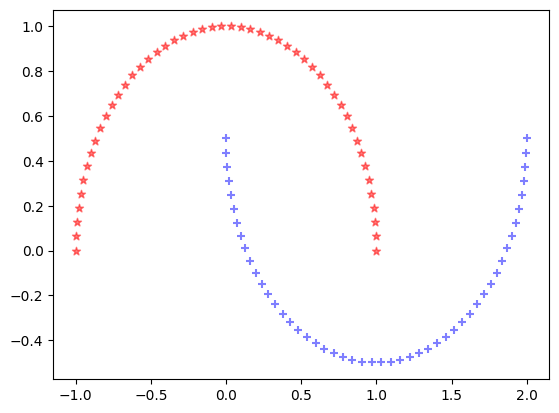

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
# Datos
X,y = make_moons(n_samples=100,random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],marker='*',color='red',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],marker='+',color='blue',alpha=0.5)
plt.show()

In [ ]:
# Estadarizamos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
# Revisar con regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# inicializar LDA y el modelo de RL
lda = LDA(n_components = 2)
lr = LogisticRegression()
# Ajustar y transformar los datos
X_lda = lda.fit_transform(X_std,y)
lr.fit( X_lda ,y)

ValueError: ignored

Obtenemos un error al querer aplicar LDA, pues el número máximo de componentes (dimensiones reducidas) que puedes obtener está limitado por el mínimo entre el número de características (n_features) y el número de clases menos uno ($2 - 1=1$ en este caso). Esto se debe a que, en LDA, se busca proyectar los datos en un espacio de menor dimensión de manera que las clases sean lo más separables posible.

 este error indica que el número de componentes (dimensiones reducidas) especificado es mayor de lo que permite LDA.

 Nos dice que el numero de componentes no puede ser mayor que el mínimo entre el numero de características (n_features) y el numero de clases menos 1 (n_classes-1)
 En este caso tenemos:
 \begin{align}
    &n\_components = 2\\
    &n\_features =2 \\
    &n\_classes-1 = 2 - 1 = 1
\end{align}
 Por lo tanto para poder utilizar LDA en este caso tendríamos la restricción de que el numero de componentes sea menor o igual a 1.

 Sin embargo al intentar este caso obtenemos un resultado no muy claro y que no nos ayuda a separar nuestras clases.


In [ ]:
# Revisar con regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# inicializar LDA y el modelo de RL
lda = LDA(n_components =1)
lr = LogisticRegression()
# Ajustar y transformar los datos
X_lda = lda.fit_transform(X_std,y)
lr.fit( X_lda ,y)

LogisticRegression()

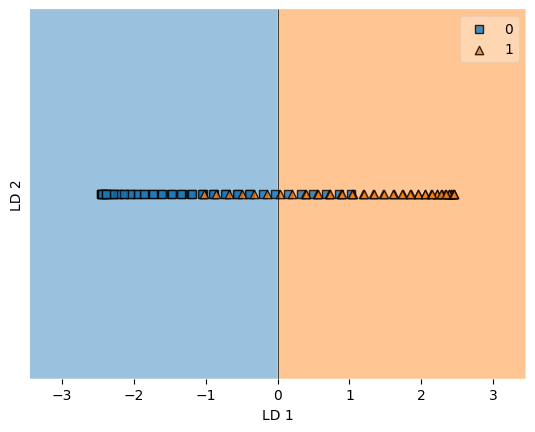

In [ ]:
# Graficamos
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_lda,y,clf=lr )
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

# Observaciones multivariadas
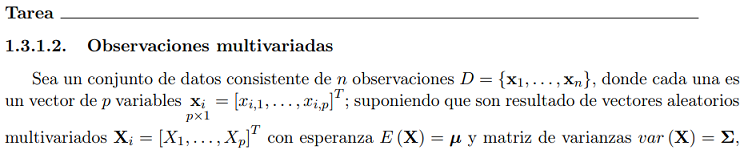

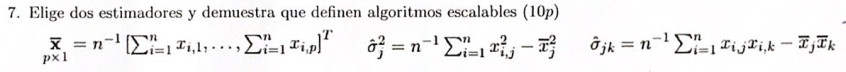

En general se trata de encontrar un vector de estadística asociativa $S(D)=[S_1(D), ... , S_n(D)]$ tal que, si partes al conjunto $D$ como una union tipo: $D_1\cup ... \cup D_k$; entonces la suma de todas las $S(D_i)$ te regresan el vector sobre $D$, esto es que:  $\sum_1^k S(D_i)= S(D)$

Luego si puedes escribir a cada estimador como operaciones entre las $S_i(D)$, entonces el estimador es escalable.

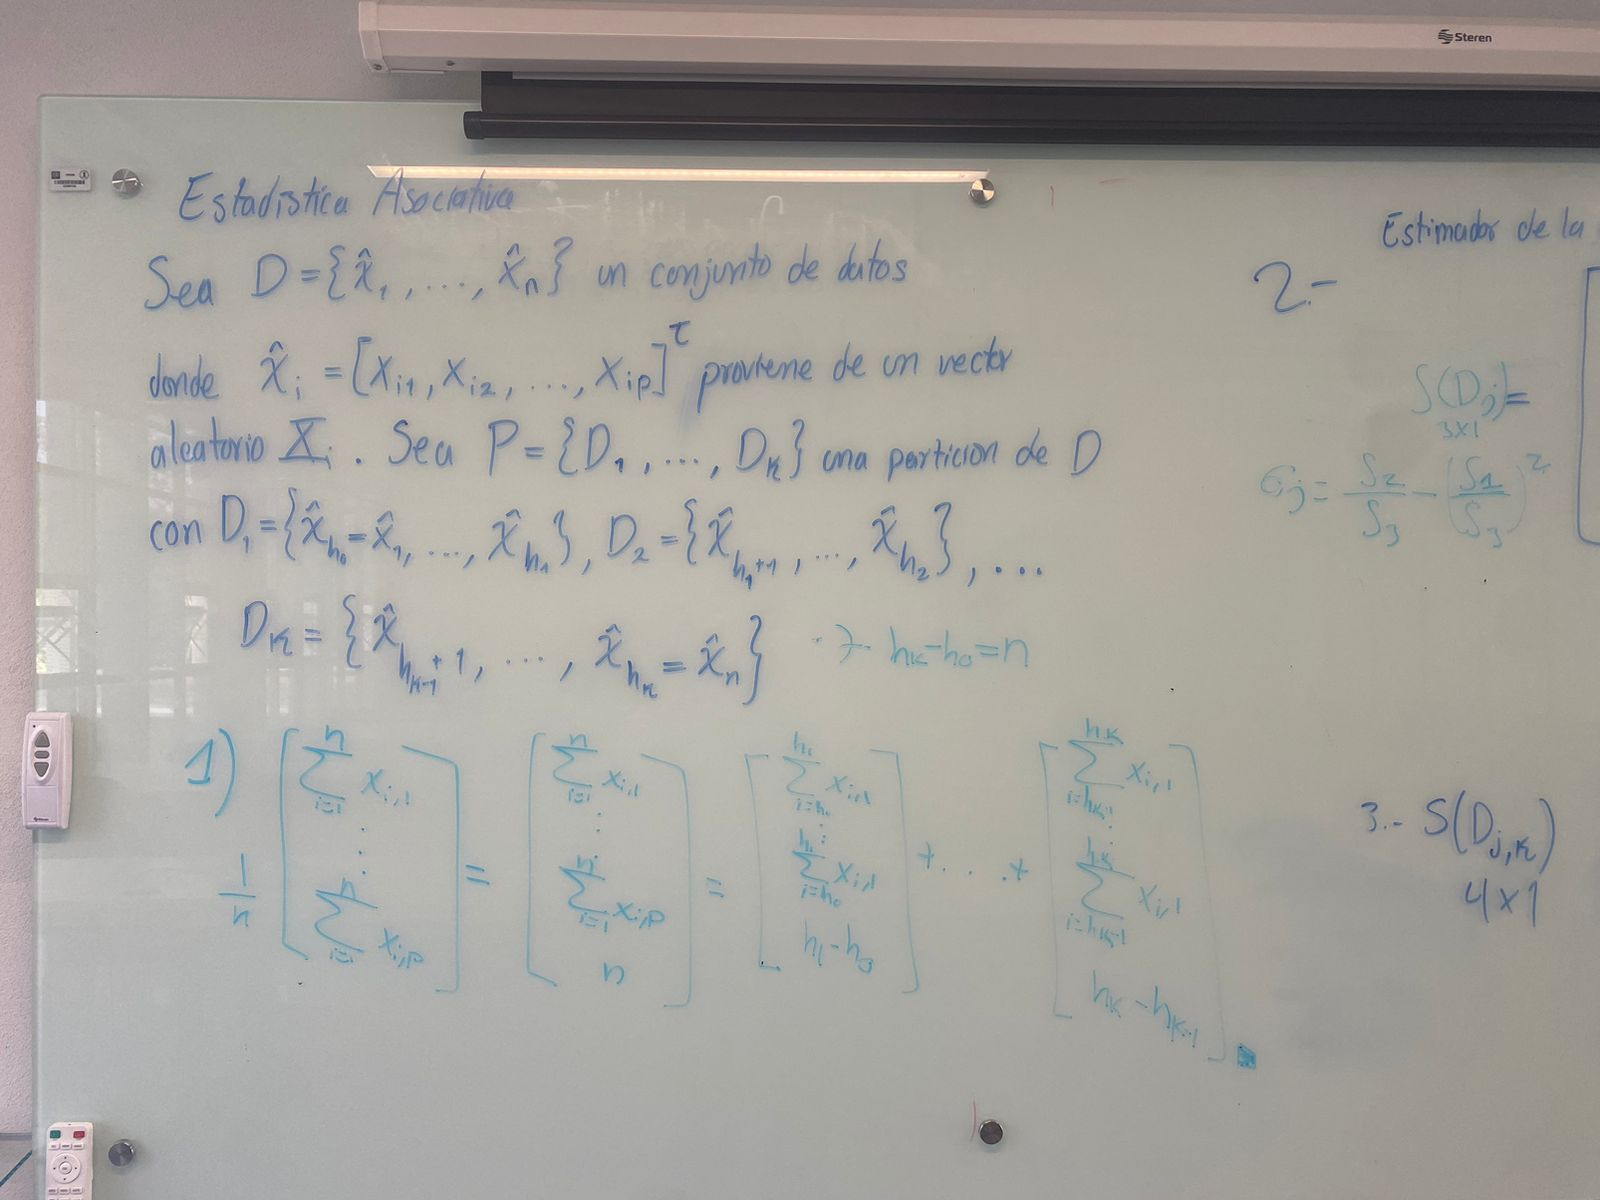

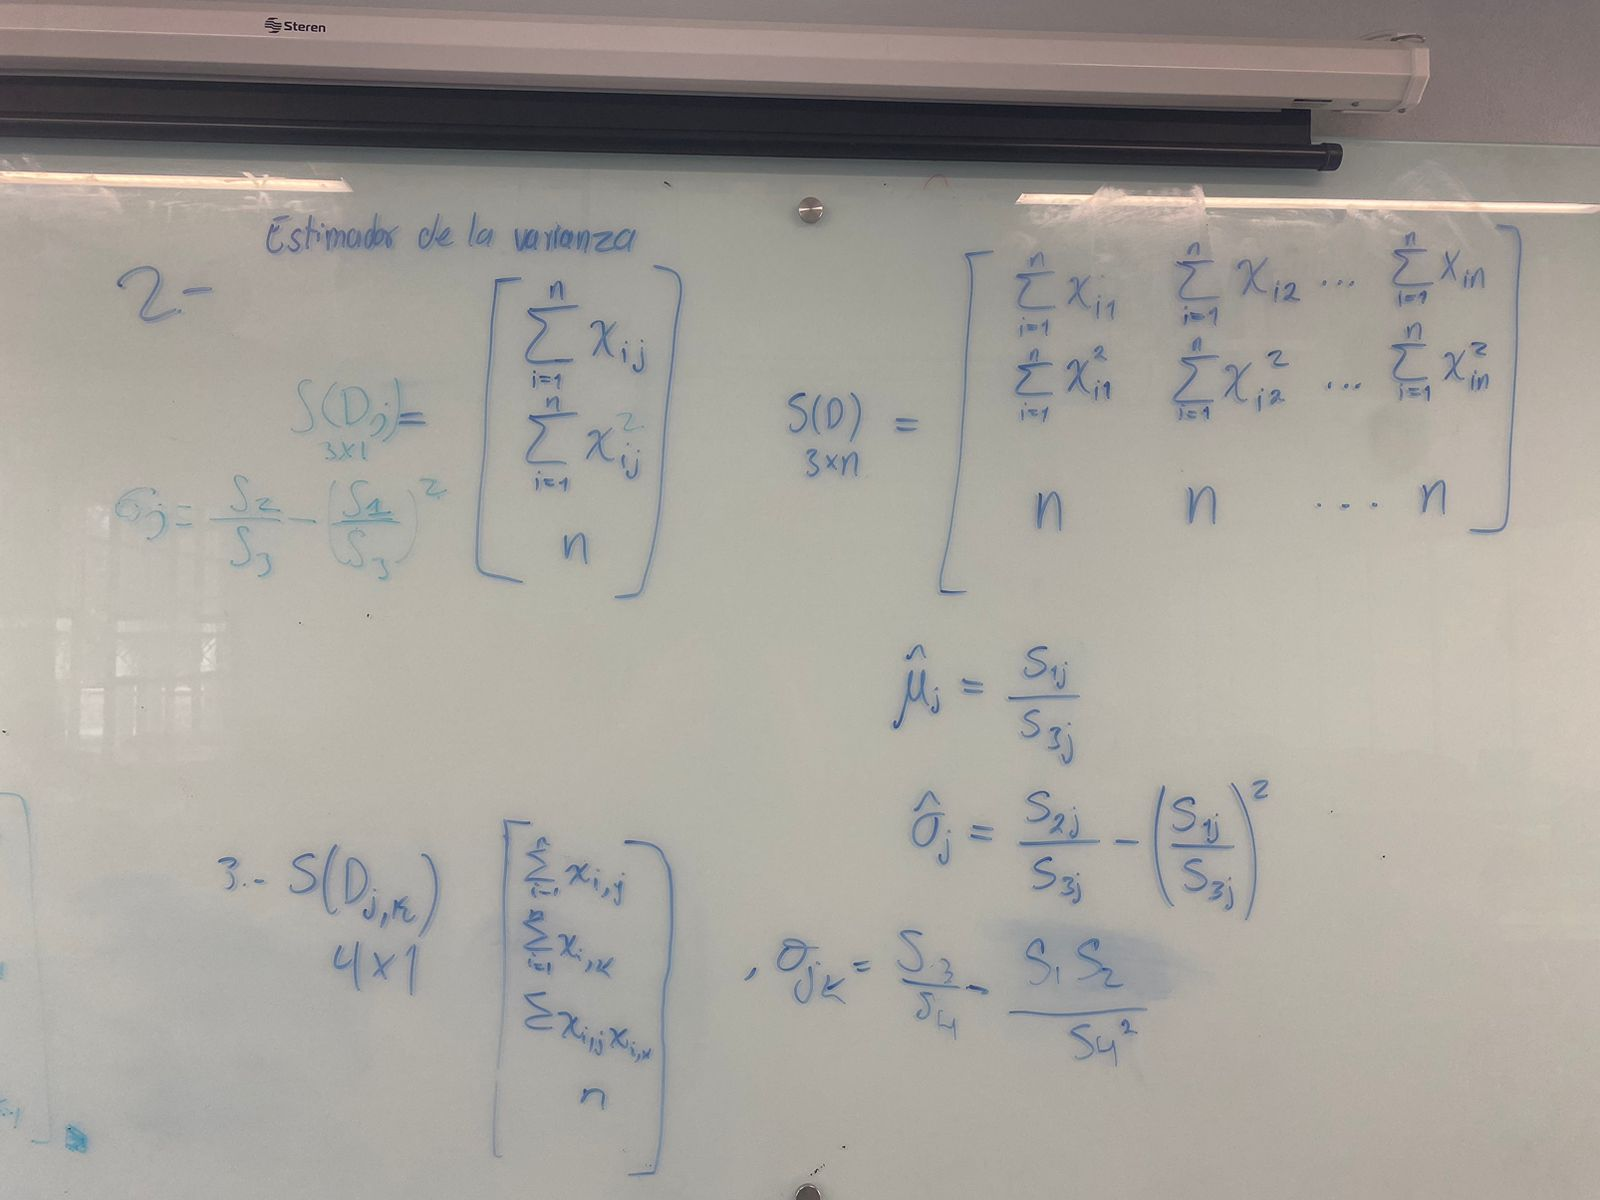

# Matriz de momentos aumentada
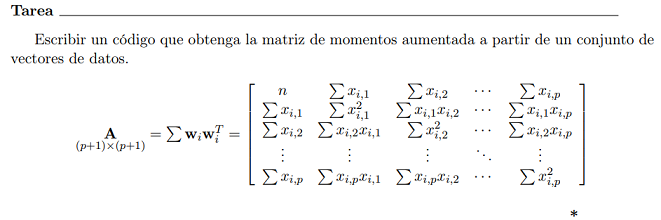

Matriz de momentos aumentada

Motivación: se puede acelerar el cálculo de $\hat{x}$,

Primero se define el i-ésimo vector aumentado, este es simplemente añadir un 1 al inicio del vector. De manera que la cantidad de renglones es igual a p+1.

De manera que se define una matriz: $w_i w^T_i$
Esta es una matriz que se obtiene por medio de un producto externo del vector $w_i$ con su transpuesta. Se obtiene la siguiente matriz, siendo una dimensión de (p+1)x(p+1).

$
\begin{bmatrix}
1 \\
x_{i,1} \\
\vdots \\
x_{i,p}
\end{bmatrix}
[1 \cdot x_{i,1} \cdot \ldots \cdot x_{i,p}]]
$

Siendo igual a

$
\begin{bmatrix}
1 & x_{i,1} \cdot \ldots \cdot x_{i,p} \\
x_{i,1} & x_{2,i,1} \cdot \ldots \cdot x_{i,1}x_{i,p} \\
\vdots & \vdots \\
x_{i,p} & x_{i,p}x_{i,1} \cdot \ldots \cdot x_{2,i,p}
\end{bmatrix}
$

Nota: el producto exterior es solo la mutiplicacion de los valores, como el caso de un producto interior, solo que la diferencia es que los valores no se van a sumar, por esto mismo queda como una matriz

Ejemplo

$
ww^T = \begin{bmatrix}
w_1w_1 & w_1w_2 & w_1w_3 & w_1w_4 \\
w_2w_1 & w_2w_2 & w_2w_3 & w_2w_4 \\
w_3w_1 & w_3w_2 & w_3w_3 & w_3w_4 \\
w_4w_1 & w_4w_2 & w_4w_3 & w_4w_4 \\
\end{bmatrix}
$


Matriz aumentada A:

$A_{(p+1) \times (p+1)} = \sum w_iw_i^T$ =

$
\begin{bmatrix}
n & \sum xi,1 & \sum xi,2 & \ldots & \sum xi,p \\
\sum xi,1 & \sum x2i,1 & \sum xi,1xi,2 & \ldots & \sum xi,1xi,p \\
\sum xi,2 & \sum xi,2xi,1 & \sum x2i,2 & \ldots & \sum xi,2xi,p \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum xi,p & \sum xi,pxi,1 & \sum xi,pxi,2 & \ldots & \sum x2i,p \\
\end{bmatrix}
$

Esto es simplemente una suma de n veces la matriz $w_iw_i^T$


**Expresion usando la matriz de momentos**

Se puede expresar A en terminos de la matriz de momentos, debido a que la diferencia entre ambas es que en A se añade solamente una columa y un renglon.

**Código**

Como es apartir de un conjunto de vectores de datos, entonces se tiene como entrada un i-esimo vector.

Por ende, se aumenta y despues se obtiene el producto exterior del vector con su transpuesta.




In [ ]:
def matriz_momentos_aumentada(w,n):
  # Aumentar el vector agregando un 1 en la primera entrada, aumentado el vector
  w.insert(0,1)
  w = np.array(w)
  # Realizando el producto exterior, dimension (p+1)x(p+1)
  A = np.outer(w,w.T)
  # Realizando las n sumas a la matriz obtenida del producto anterior
  for i in range(n):
    A += A
  return A


In [ ]:
matriz_momentos_aumentada([2,3,4],2)

array([[ 4,  8, 12, 16],
       [ 8, 16, 24, 32],
       [12, 24, 36, 48],
       [16, 32, 48, 64]])

# Bins
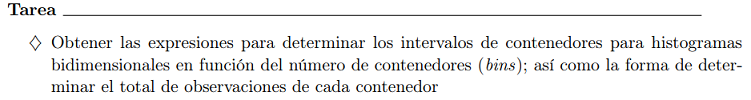

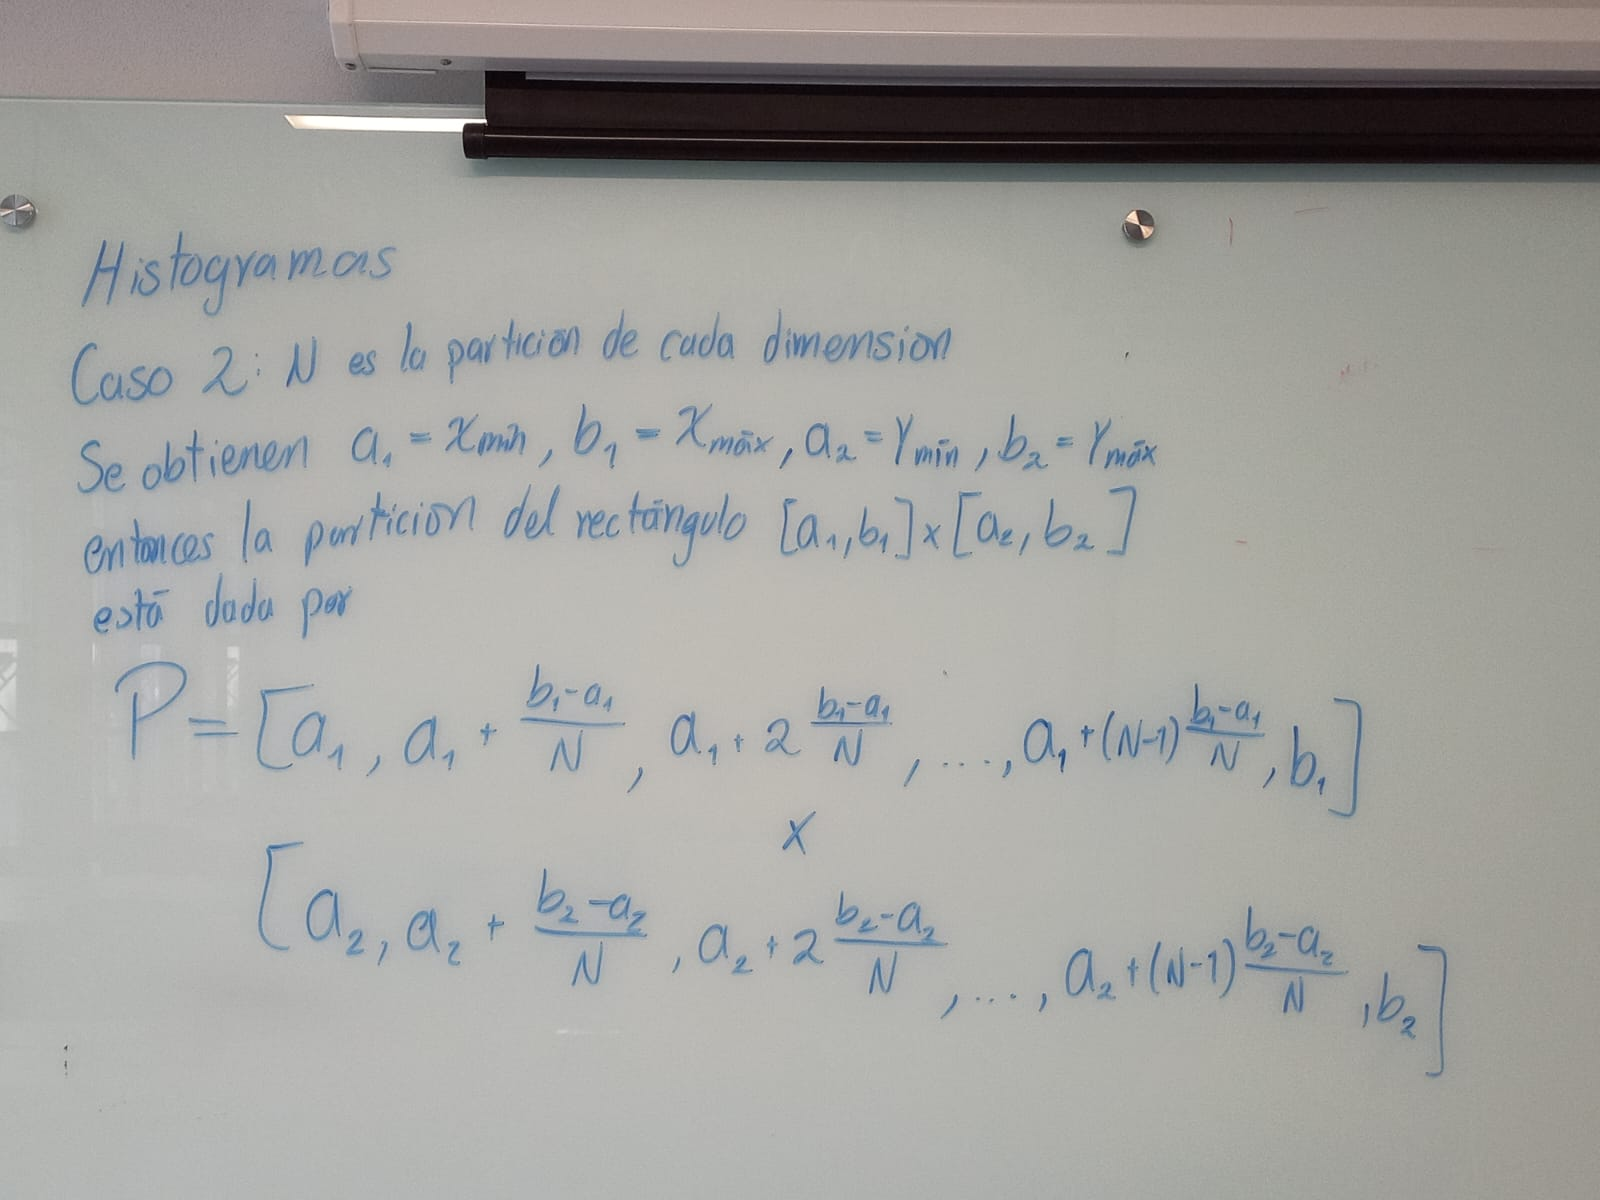

# MapReduce

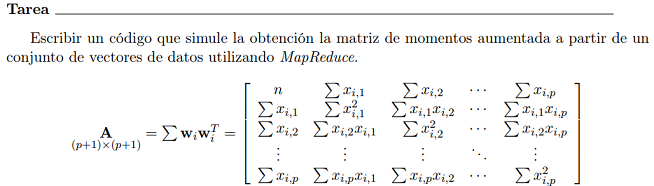

## Introducción a Hadoop, MapReduce y procesos por lotes
Motivación: al tener tantos datos, lo más viable es distribuirlos en diferentes nodos. O sea tener los datos en una red, cada nodo procesa subconjuntos de los datos.

El algoritmo debe de cumplir cierta estructura y la red debe ser administrada. Esto lo provee Handoop y MapReduce.

Handoop: colección de programas y servicios que construyen al cluster. Distribuyen datos, controlan su procesamiento y transmisión de resultados.
MapReduce: asegura escalabilidad, asegura que los resultados sean independientes de la configuración del cluster.

El MapReducer consiste de tres pasos:
1. Mapear
2. Reducir
3. Shuffle

### Implementación de MapReduce


In [ ]:
## Implementación del mapeo
#!/usr/bin/env python
"""mapper.py"""
import sys

# Los datos se leen de la entrada estándar
for line in sys.stdin:
    # Eliminar espacios en blanco
    line = line.strip()
    # Separar "palabras"
    words = line.split()
    # Incrementar contadores
    for word in words:
        # Escribir el resultado a la salida estándar
        # Esta salida será la entrada para reducer.py
        # Separado por tabulador, cada palabra cuenta 1
        print('%s\t%s' % (word, 1))


In [ ]:
## Probando
echo " hola mundo cruel probando hola mundo adiós mundo cruel " \
| ./ mapper . py

' hola mundo cruel probando hola mundo adiós mundo cruel '

In [ ]:
#!/usr/bin/env python
"""reducer.py"""
import sys

current_word = None
current_count = 0
word = None

for line in sys.stdin:
    line = line.strip()

    # Separar los datos obtenidos de mapper.py
    word, count = line.split('\t', 1)

    # Convertir la cuenta a entero
    try:
        count = int(count)
    except ValueError:
        # Si no era un entero, se ignora
        continue

    # Este IF funciona porque Hadoop ordena la salida del mapper
    # por la clave (word) antes de que la reciba el reducer
    if current_word == word:
        current_count += count
    else:
        if current_word:
            print('%s\t%s' % (current_word, current_count))
        current_count = count
        current_word = word

# Es necesario escribir la última palabra
if current_word == word:
    print('%s\t%s' % (current_word, current_count))


None	0


In [ ]:
echo " hola mundo cruel probando hola mundo adiós mundo cruel " \
| ./ mapper_O . py | sort -k1 ,1 | ./ reducer_O . py

### Versión mejorada usando iteradores generadores en python

In [ ]:
#!/usr/bin/env python
"""Un Mapper más avanzado con iteradores y generadores de Python"""
import sys

def read_input(file):
    for line in file:
        yield line.split()

def main(separator='\t'):
    data = read_input(sys.stdin)
    for words in data:
        for word in words:
            print('%s %s %d' % (word, separator, 1))

if __name__ == "__main__":
    main()


In [ ]:
#!/usr/bin/env python
"""Un Reducer más avanzado con iteradores y generadores de Python"""
from itertools import groupby
from operator import itemgetter
import sys

def read_mapper_output(file, separator='\t'):
    for line in file:
        yield line.rstrip().split(separator, 1)

def main(separator='\t'):
    data = read_mapper_output(sys.stdin, separator=separator)
    for current_word, group in groupby(data, itemgetter(0)):
        try:
            total_count = sum(int(count) for current_word, count in group)
            print("%s %s %d" % (current_word, separator, total_count))
        except ValueError:
            pass

if __name__ == "__main__":
    main()


# Discriminantes Clasificador a Priori

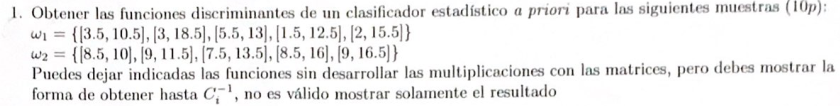

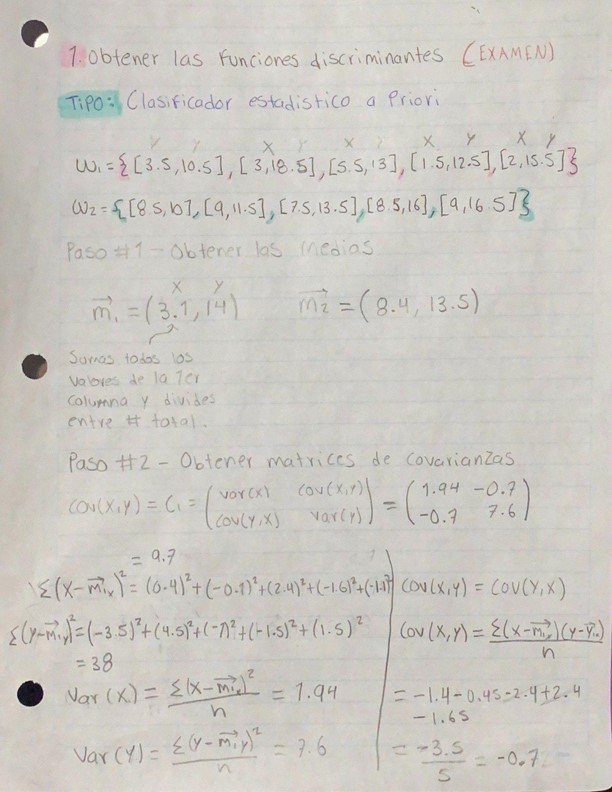

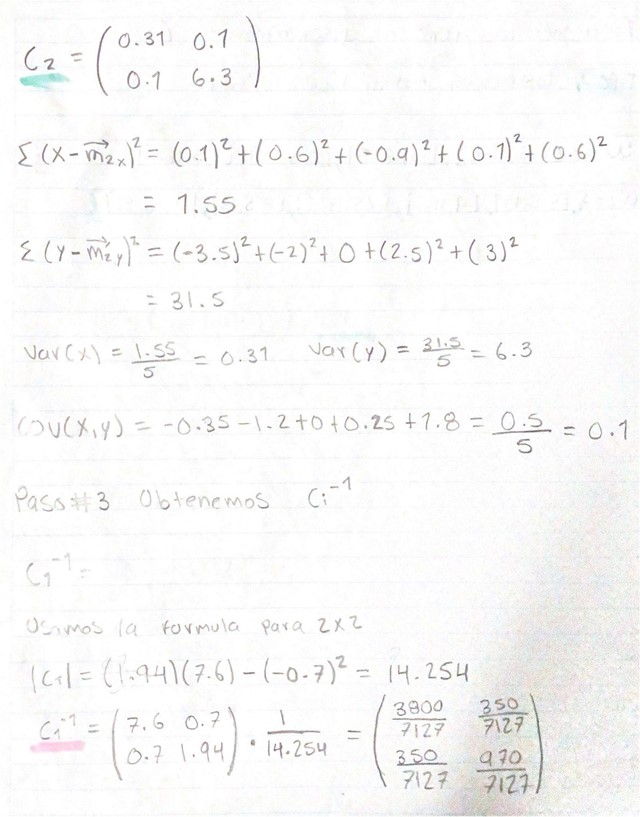

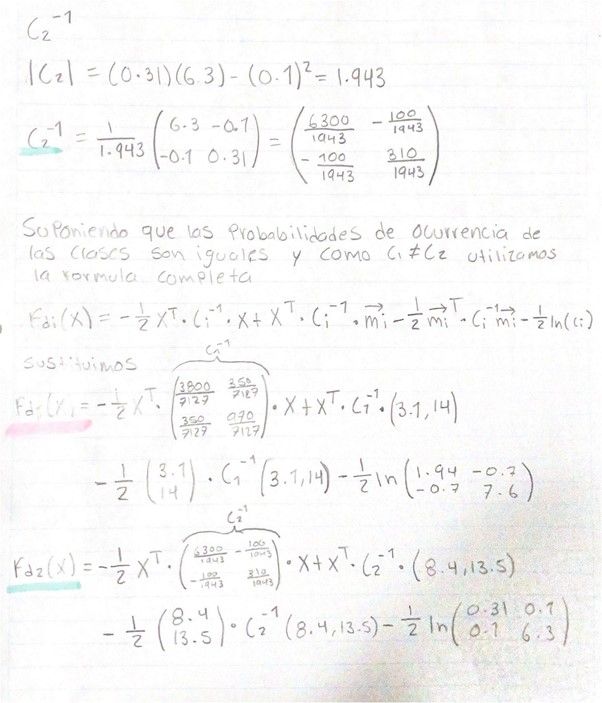

## Clasificador de distancia euclidiana determinista a priori

Por que es determinista?
Se trata de que la deteccion de un grupo que pertenece a una clase se realiza con un solo vector llamado vector prototipo, para este clasificador tambien recibe el nombre de centroide. Asi mismo, su nombre de determinista indica que se puede determinar, tal que se hace por medio de un centroide.
<br><br>

Por que es priori?
Tiene una una funcion discriminante que se trata de un solo calculo, siendo este un calculo directo y exacto. No hay una seccion de aprendizaje por parte del algoritmo.

### Funcionamiento
Se usa la siguiente funcion discriminante

$dE = \sqrt{X^T X - 2 X^T Z_K + Z^T_K Z_K}$

De modo que aquel patron desconocido X cuya distancia sea la menor con respecto a alguno de los centroides, significa que pertenece a esa clase.

Tambien se puede simplificar la raiz cuadrada y obtener lo siguiente

$f(d_K(X)) = X^T Z_K - \frac{1}{2} Z^T_K Z_K \quad \forall k \in K$

No obstante, debido a este cambio, ahora se tiene que la funcion discriminante con valor maximo sera aquella que nos diga a que clase pertenece el patron X

El resultado de este clasificador son funciones discriminantes para distinguir entre dos clases usando la muestra proporcionada, siendo $w_i$

In [ ]:
import numpy as np
from sympy import Matrix, symbols, simplify

def clasif_e(samples):
  n_samples = len(samples)

  # Creando vector generico con simpy
  X = Matrix( [symbols(' x'+str(i+1)) for i in range(samples[0].shape[0])] )

  print('Variables : ',X)
  fds=[]

  for s in samples:
    m = Matrix(np.mean(s, axis=1)) # Se saca la media de los renglones
    fds.append(simplify(X.T*m - (m.T*m)/2))
  return fds

In [ ]:
# Ejemplo de uso
w1 = np.array( [[1,5,6,1], [2,3,4,-2], [0,1,5,3], [1,3,5,2]] ).T # Se saca la transpuejsta para quje sean conformables, pero se podria segujir el formato de operacion anterior como esta emarcado en el docuemnto
w2 = np.array( [[6,8,-1,6], [7,9,3,6], [8,7,1,9]]).T

samples = (w1,w2)
fds = clasif_e(samples)

for fd in fds:
  print(fd)

Variables :  Matrix([[x1], [x2], [x3], [x4]])
Matrix([[1.0*x1 + 3.0*x2 + 5.0*x3 + 1.0*x4 - 18.0]])
Matrix([[7.0*x1 + 8.0*x2 + 1.0*x3 + 7.0*x4 - 81.5]])


In [ ]:
for fd in range(len(fds)):
  print('fd'+str(fd+1)+': ',fds[fd].evalf(subs={'x1':3,'x2':1,'x3':3,'x4':1}))

fd1:  Matrix([[4.00000000000000]])
fd2:  Matrix([[-42.5000000000000]])


## Tarea 1

Obtener las funciones discriminantes para las muestras:

$\omega_1 = \{(0.5, 10.5),(1, 12.5),(3, 10.5),(3, 12.5),(3, 14.5),(3, 18),(5, 18),(5, 16),(5, 14.5),(5, 13)\}$

$\omega_2 = \{(6, 9),(8, 10),(9, 11),(8.5, 12),(7, 13.5),(8, 16)\}$

Representarlo gráficamente.

Solucion: se tiene de entrada muestras, por ende vamos a sacar sus centroides

In [ ]:
w1 = np.array( [[0.5, 10.5], [1, 12.5], [3, 10.5], [3, 12.5], [3, 14.5], [3, 18], [5, 18], [5, 16], [5, 14.5], [5, 13]] ).T # Representacion de vector columna, por la transpuesta
w2 = np.array( [[6,9], [8,10], [9,11], [8.5,12], [7,13.5], [8,16]] ).T
samples = (w1,w2)
fds = clasif_e(samples)
for fd in fds:
  print(fd)


Variables :  Matrix([[x1], [x2]])
Matrix([[3.35*x1 + 14.0*x2 - 103.61125]])
Matrix([[7.75*x1 + 11.9166666666667*x2 - 101.034722222222]])


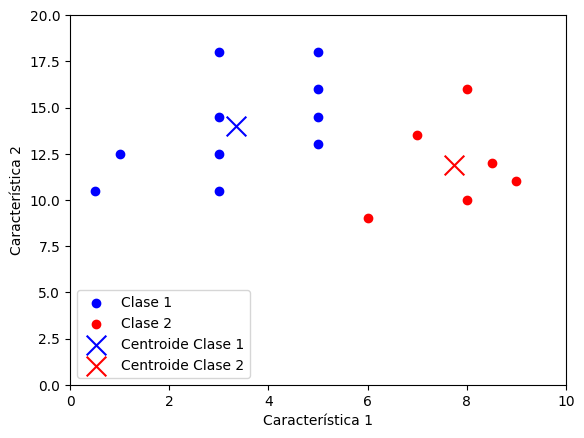

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Puntos de la clase 1 y sus centroides
class1_points = np.array([[0.5, 10.5], [1, 12.5], [3, 10.5], [3, 12.5], [3, 14.5], [3, 18], [5, 18], [5, 16], [5, 14.5], [5, 13]])
class1_centroid = np.mean(class1_points, axis=0)

# Puntos de la clase 2 y sus centroides
class2_points = np.array([[6, 9], [8, 10], [9, 11], [8.5, 12], [7, 13.5], [8, 16]])
class2_centroid = np.mean(class2_points, axis=0)

# Crear una función discriminante ficticia (puedes reemplazarla por tus propias funciones)
def discriminant_function(x, centroid):
    return x[0] - centroid[0] + x[1] - centroid[1]

# Crear una malla para el gráfico
x = np.linspace(0, 10, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x, y)

# Calcular los valores de la función discriminante para cada punto de la malla
discriminant_values = discriminant_function([X, Y], class1_centroid) - discriminant_function([X, Y], class2_centroid)

# Crear el gráfico de dispersión de las dos clases y sus centroides
plt.scatter(class1_points[:, 0], class1_points[:, 1], c='blue', label='Clase 1')
plt.scatter(class2_points[:, 0], class2_points[:, 1], c='red', label='Clase 2')
plt.scatter(class1_centroid[0], class1_centroid[1], marker='x', c='blue', s=200, label='Centroide Clase 1')
plt.scatter(class2_centroid[0], class2_centroid[1], marker='x', c='red', s=200, label='Centroide Clase 2')

# Graficar la línea de decisión (donde la función discriminante es igual a cero)
plt.contour(X, Y, discriminant_values, levels=[0], colors='green', linestyles='dashed')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()


# Perceptron
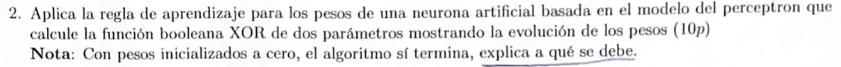

La regla de aprendizaje, que es en sí un algoritmo, del perceptrón es la siguiente

1. Se inicializa los pesos y el sesgo (bias), con valores ceros o muy cercanos a cero.
2. Para cada muestra de entrenamiento $x^i$

    2.2 calcular el valor de salida $\hat{y}^i$ que sería la nueva predicción
    2.3 Actualizar pesos
  
**La actualización de lo pesos es de la forma:**

$w_j = w_j + \Delta w_j x_i$

Donde:

$\Delta w_j = \eta (y^i - \hat{y}^i)$

Notas:

$\eta$ : esto lo que hace es afectar directamente los vectores. Suele recibir un valor pequeño, entre 0 y 1.0, aunque normalmente suele ser de 0.1. No obstante, si todos los pesos son inicializados en 0 entonces este valor no podrá afectar la dirección de los vectores, unicamente su magnitud. Por esto mismo no es recomendable inicializar todos los valores en 0, la razón es que puede que tarde más encontrar o converger dicho clasificador.

No obstante se puede tener casos en donde al inicializar todo en cero se tenga una convergencia y buen comportamiento del mismo. Esto se debe cuando las muestras no son tan complejas de separar. Es el caso de hacer que un perceptrón aprenda NAND

Ejemplo para dos dimensiones

1. $\Delta w_0 = \eta (y^i - \hat{y}^i)$
2. $\Delta w_1 = \eta (y^i - \hat{y}^i) x_1^{(i)}$
3. $\Delta w_2 = \eta (y^i - \hat{y}^i) x_2^{(i)}$

Importante notar que w_0 es el sesgo, o sea bias, y esto según entiendo sería un factor de corrección. Tal que este es tal cual el umbral, $w_0 = θ$.

La obtención de una predicción consiste de la combinación lineal de las entradas multiplicado por sus pesos. De manera que $w_0$ lo multiplica $x_0$ siendo este 1. La combinación lineal, siendo, debe de superar al umbral para tener una activación. Si $z$ es la combinación lineal, entonces $z>θ$ para activar el perceptrón. No obstante al parecer se puede nombrar como $y^i$ ya que estos hacen referencia a una predicción de manera que cada predicción se calcula como z, siendo una combinación lineal de las entradas por los pesos.

Se tendrá un peso por cada dimensión

## Tarea 2
Utilizando el valor η = 0.1, aplicar el algoritmo de aprendizaje del perceptrón para una neurona artificial que calcule la función booleana NAND con 2 parámetros definida como:

**Solución**
Se contempla que se tiene tres pesos
1. Para el sesgo
2. Para la dimension $x_1$
3. Para la dimension $x_2$

El código siguiente finalmente corresponde para un perceptrón bidimensional

In [ ]:
import random
import numpy as np



# definiendo funciones
def predicion(X,pesos):

  return np.dot(X, pesos[1:]) + pesos[0] # Se suma el sesgo

# Aquí se regresa según sea el valor obtenido, para valores mayores a cero, es 1, negativos es -1
def predicion_eleccion(X,pesos):
  return np.where(predicion(X,pesos) >= 0.0, 1,-1) # ALternativa: np.sign(X[i].dot(w[1:]) + w[0])

def aprendizaje(X,pesos,n,y,no_iter):
  # El ajuste debe de realizarse una cantidad determinada de veces, debido a que nunca converge, entonces no podríamos salir de la misma
  evolucion = []
  for i in range(no_iter):
    # Se necesita ajustar los pesos tomando en cuenta cada
    for i in range(X.shape[0]):
      update = n * (y[i] - predicion_eleccion(X[i],pesos))
      # Actualizando el umbral
      pesos[0] += update

      # Actualizando los demás pesos de las entradas
      pesos[1:] += update * X[i]

    # Guardando historico de pesos
    evolucion.append(pesos)

  return pesos, evolucion

### Datos de entrada para que el perceptrón aprenda NAND

In [ ]:
# Datos de entrada
## Código de la tarea
# Definiendo el resultado correcto de cada muestra de entrenamiento
y = np.array([1,1,1,-1])

# Definiendo la muestra de entrenamiento, o sea el vector X
X = np.array([ [0,0],[0,1],[1,0],[1,1] ])

# Inicializando los pesos, w_0 es igual umbral y también se inicializa aleatoriamente.

# Para este caso veamos una inicializacón de 0 a 1
#pesos = [random.uniform(-1, 1) for _ in range(3)]

# usando ceros
pesos = [0] * 3

### Implementación para verificar aprendizaje

In [ ]:
# Verificando que aprendió bien - No se puede resolver con un solo perceptrón
w,e = aprendizaje(X,pesos,0.1,y,6)

# Bandera de visualizacion
bandera = True


# Evaluación después del entrenamiento
for i in range(len(X)):
    y_pred = np.where(( np.dot(X[i], w[1:]) + w[0]) >=  0.0, 1,-1)
    print(f'Entradas: ({X[i][0]}, {X[i][1]}), Predicción: {y_pred}, Esperado: {y[i]}')

    if y_pred != y[i]:
      print("El perceptrón NO aprendió la operación")
      bandera = False
      break

if bandera: print("El perceptrón SÍ aprendió la operación")

# Evolucion de los pesos
for i in e: print("Pesos: ",i)


Entradas: (0, 0), Predicción: 1, Esperado: 1
Entradas: (0, 1), Predicción: 1, Esperado: 1
Entradas: (1, 0), Predicción: 1, Esperado: 1
Entradas: (1, 1), Predicción: -1, Esperado: -1
El perceptrón SÍ aprendió la operación
Pesos:  [0.4, -0.4, -0.2]
Pesos:  [0.4, -0.4, -0.2]
Pesos:  [0.4, -0.4, -0.2]
Pesos:  [0.4, -0.4, -0.2]
Pesos:  [0.4, -0.4, -0.2]
Pesos:  [0.4, -0.4, -0.2]


### Conjunto de datos para que el perceptrón aprenda XOR

In [ ]:
y_xor = np.array([-1,1,1,-1])
X_xor = np.array([ [0,0],[0,1],[1,0],[1,1] ])
pesos_xor = [random.uniform(-1, 1) for _ in range(3)]

In [ ]:
# Verificando que aprendió bien - No se puede resolver con un solo perceptrón
w,e = aprendizaje(X_xor,pesos_xor,0.1,y_xor,1000)

# Bandera de visualizacion
bandera = True


# Evaluación después del entrenamiento
for i in range(len(X)):
    y_pred = np.where(( np.dot(X_xor[i], w[1:]) + w[0]) >=  0.0, 1,-1)
    print(f'Entradas: ({X_xor[i][0]}, {X_xor[i][1]}), Predicción: {y_pred}, Esperado: {y_xor[i]}')

    if y_pred != y_xor[i]:
      print("El perceptrón NO aprendió la operación")
      bandera = False
      break

if bandera: print("El perceptrón SÍ aprendió la operación")

#Evolucion de los pesos
#for i in e: print("Pesos: ",i)

Entradas: (0, 0), Predicción: 1, Esperado: -1
El perceptrón NO aprendió la operación


# SFS
SFS.png

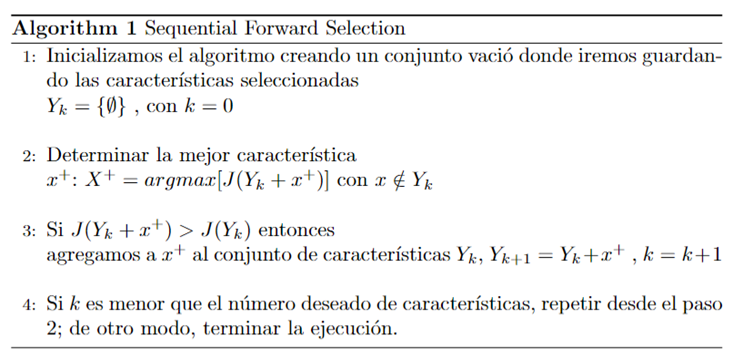

Algoritmo 1.2 Sampling Forward Selection

* Inicializar el algoritmo con k = 0.
* Generar un conjunto de muestras aleatorias de tamaño k del conjunto de características original Xd.
* Evaluar el conjunto de muestras usando un criterio de selección.
* Si el conjunto de muestras tiene un rendimiento superior al conjunto de características original, agregar las características al conjunto de características seleccionadas.
* Aumentar k en 1.
* Repetir desde el paso 2 hasta que k sea igual al número deseado de características.

Explicación de los pasos:

El algoritmo se inicializa con k = 0, lo que significa que no hay características seleccionadas inicialmente.

Se genera un conjunto de muestras aleatorias de tamaño k del conjunto de características original Xd.

El conjunto de muestras se evalúa usando un criterio de selección, como la precisión de un modelo de aprendizaje automático.

Si el conjunto de muestras tiene un rendimiento superior al conjunto de características original, las características del conjunto de muestras se agregan al conjunto de características seleccionadas.

k se incrementa en 1 para indicar que una nueva característica ha sido seleccionada.

El algoritmo se repite desde el paso 2 hasta que k sea igual al número deseado de características.

# SBS

**Seleccionando características significativas**

Al momento de darle datos de entrenamiento a un clasificador se puede tener el caso que el clasificador ofrece mejores resultados para el conjunto de datos de entrenamiento que el conjunto de datos de prueba. Esto son problemas de sobreajustes, ya que el modelo se está sobreajustando a estos datos de entrenamiento tal que genera problemas para su generalización, lo cual se ve presente al probarlo con su conjunto de pruebas.

Una posible solución es realizar una reducción de la dimensión de los datos.

**Selección secuencial de características - Sequential Backward Selection**

1. Objetivo: reducción de dimensión de datos.
2. Tiene un mínimo de perdidas en el rendimiento del modelo, mejora su eficiencia computacional
3. Puede mejorar el proder predictivo de un modelo si está sobreajustado.
4. Reducción a k dimensiones, siendo k< d

Idea inicial: Eliminar carácteristicas de un conjunto hasta obtener un número deseado de características. El juicio de eliminación queda en una función criterio $f$.

El criterio de eliminación es comparar el rendimiento del modelo antes y después de la eliminación de una carácterística x. Esto es maximizar una diferencia.


Una dimensión se refiere a una característica.

Pseudocódigo
1. Seleccionar un modelo de aprendizaje y un conjunto de datos.
2. Dividir el conjunto de datos en datos de prueba y datos de entrenamiento.
3. Estandarizar los datos.
2. Inicializar el algoritmo, el modelo, con un conjunto de datos X de dimensión d. Tal que d se trata de la dimensión original del conjunto de datos. Se realiza  el entrenamiento con el conjunto de datos de entrenamiento.
3. Escoger una métrica para relizar la evaluación del rendimiento del método.
5. Evaluar el rendimiento del modelo usando el conjunto de datos de prueba.
6. Determinar la característica $x^{-}$ que maximiza el criterio: $x^{-}$ = arg máx($J(X_k - x)$) donde $x \epsilon X_k$
7. Eliminar la característica $x^{-}$ del conjunto. De manera que nuestro nueva conjunto es: $X_{k-1} = X_k - x^{-}$. Así mismo la dimensión k = k - 1.
8. Repetir los pasos 4 al 7 hasta llegar a un criterio de parada.

El criterio de parada depende de la cantidad de carácterísticas restantes deseadas, o un rendimiento esperado.